In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

%config IPCompleter.greedy = True
%matplotlib inline

Будем предсказывать зарплату по описанию вакансии - это задача регрессии!

In [ ]:
df = pd.read_csv("salary_data_cleaned.csv")

In [ ]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0


Посмотрим на распределение целевой переменной

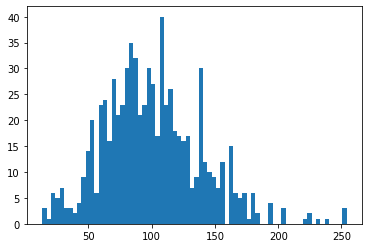

In [ ]:
plt.hist(df.avg_salary, bins=70)
plt.show()

Похоже на нормальное. Лучший вариант для линейной регрессии :)

Закодируйте колонку "Job Description" при помощи tf-idf

*  попробуйте подобрать гиперпараметры min_df, max_df, ngram_range у метода для достижения наилучшего качества модели

In [ ]:
# ваш код здесь

**Вопрос:** если использовать min_df = 5, max_df=1, ngram_range=(1,1), то сколько столбцов получится в матрице после применения кодировки?

Разобъем данные на тренировочные и тестовые. 

Здесь f - это матрица, полученная в результате кодирования столбца Job Description.

In [ ]:
trX, teX, trY, teY = train_test_split(f, df["avg_salary"], test_size=0.2)

Обучите линейную регрессию под названием Ridge на тренировочных данных и сделайте предсказания на тренировочных и тестовых данных.

**model = Ridge(alpha=1.1)**

In [ ]:
# ваш код здесь

Посчитаем метрику качества предсказания $R^2$. Чем ближе она к 1, тем лучше качество модели.

Посчитайте значение $R^2$ на тренировочных и на тестовых данных.

**Вопрос:** чему равен $R^2$ на тесте? 

In [ ]:
# ваш код здесь

Потестируем нашу модель. Посмотрим. как она оценивает зарплаты :)

In [ ]:
clf.predict(tfidf.transform([u"director"]))

In [ ]:
clf.predict(tfidf.transform([u"manager"]))

**Вопрос:** посчитайте зарплату "data scientist" при помощи модели.

In [ ]:
# ваш код здесь

Посмотрим на веса модели

**Вопрос:** какой признак имеет наибольший положительный вес?


In [ ]:
%%time
coefs = sorted(zip(list(np.array(tfidf.get_feature_names())[clf.coef_ != 0]), clf.coef_[clf.coef_ != 0]),
               key=lambda x: -x[1])
coefs = pd.DataFrame(coefs, columns=["ngram", "weight"])

In [ ]:
# ваш код здесь